In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Explicación
El proposito del método de montecarlo es hallar el área de una figura usando el área de una ya conocida. Para hallar el volumen del lobulo de Roche (y asi conocer su radio), es necesario usar este método. Lo que se hará es colocar N partículas al azar dentro de un cubo (el cubo tendrá como lado 2 veces la distancia de la partícula más masiva a L1), se calculará la constante de jacobi para cada partícula y se va a verificar que la velocidad de la partícula sea mayor a cero (es decir, se encuentre dentro del lóbulo), si v>0, va sumando el número de Nv. Al tener el número total de partículas dentro, se calcula el volumen usando
$$V_l = \frac{N_v}{N}V(d_{L1})$$

In [75]:
alfa = 0.5

In [80]:
def esfera(r):
  phi = np.arange(0, np.pi, 0.01)
  theta = np.arange(0, 2*np.pi, 0.01)
  theta, phi = np.meshgrid(theta, phi)

  x = r*np.sin(phi)*np.cos(theta)
  y = r*np.sin(phi)*np.sin(theta)
  z = r*np.cos(phi)

  fig = plt.figure()
  ax = Axes3D(fig)
  ax.plot_surface(x,y,z, color='m', alpha=0.3)
  return x,y,z

r=1
phi = np.arange(0, np.pi, 0.01)
theta = np.arange(0, 2*np.pi, 0.01)
theta, phi = np.meshgrid(theta, phi)

x = r*np.sin(phi)*np.cos(theta)
y = r*np.sin(phi)*np.sin(theta)
z = r*np.cos(phi)
  
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.plot_surface(x,y,z, color='m', alpha=0.3)
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x)
plt.show()
x

<IPython.core.display.Javascript object>

TypeError: ignored

In [44]:
def Cj(alfa):
  # Obtener el mapa de la constante de Jacobi con dicho alfa
  Ng=50
  xs = np.linspace(-2,2,Ng)
  ys = np.linspace(-2,2,Ng)
  
  X,Y = np.meshgrid(xs,ys)
  Z=0.0*np.ones_like(X)

  R1 = np.sqrt((X+alfa)**2+Y**2+Z**2)
  R2 = np.sqrt((X-1+alfa)**2+Y**2+Z**2)
  CJ = 2*(1-alfa)/R1+2*alfa/R2+X**2+Y**2

  c = plt.contourf(X, Y, CJ, cmap="nipy_spectral", levels=np.linspace(2,6,50))
  plt.colorbar(c)
  plt.axis("equal")

  return CJ

array([8.71192579, 8.40639915, 8.11440228, 7.83589956, 7.57084883,
       7.31920093, 7.08089929, 6.85587973, 6.64407032, 6.44539164,
       6.25975714, 6.08707391, 5.92724377, 5.78016475, 5.64573281,
       5.52384404, 5.41439689, 5.31729474, 5.23244827, 5.15977789,
       5.09921574, 5.05070738, 5.01421295, 4.98970774, 4.97718224,
       4.97664166, 4.98810502, 5.01160391, 5.04718104, 5.09488878,
       5.15478763, 5.22694483, 5.31143308, 5.40832939, 5.51771397,
       5.63966927, 5.77427903, 5.92162734, 6.08179774, 6.25487228,
       6.44093068, 6.64004952, 6.85230147, 7.07775472, 7.31647246,
       7.56851253, 7.83392723, 8.11276324, 8.40506166, 8.71085819])

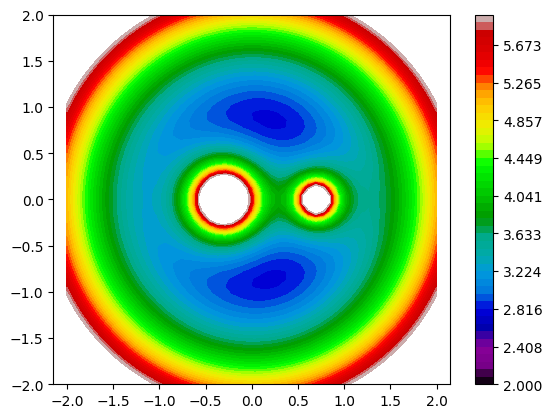

In [46]:
Cj(0.3)[0]

0.1538537569257314

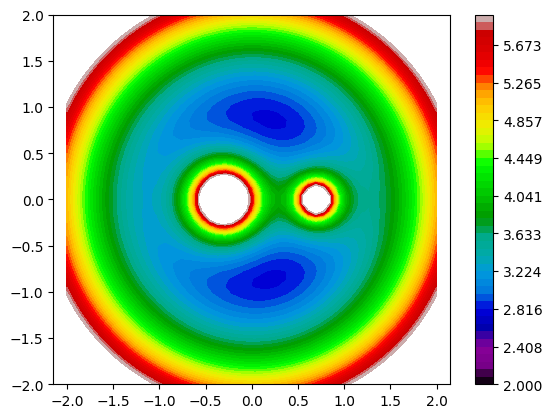

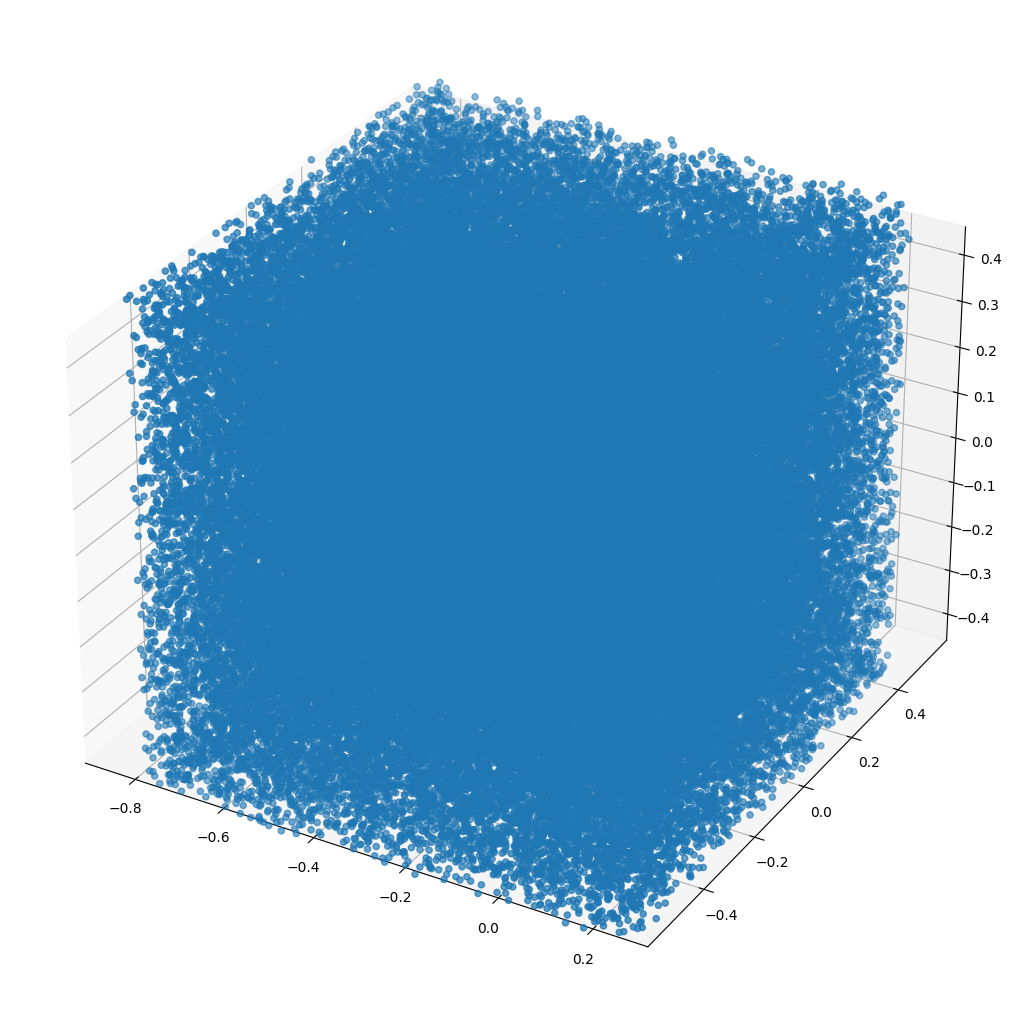

In [39]:
def vol(alfa):
  cj = Cj(alfa)
  
  rm1 = [-alfa, 0, 0]
  rm2 = [1-alfa, 0, 0]
  
  L1 = 1 - alfa - (alfa/3)**(1/3)
  
  N = 100000
  Nv = 0

  xv = []
  yv = []
  zv = []

  for i in range(N):
    
    x = np.random.uniform(-2*alfa-L1, L1)
    y = np.random.uniform(-alfa-L1, alfa+L1)
    z = np.random.uniform(-alfa-L1, alfa+L1)
    r = (x+alfa)**2+y**2+z**2

    r1 = np.sqrt((x+alfa)**2 + y**2 + z**2)
    r2 = np.sqrt((x-(1-alfa))**2 + y**2 + z**2)
    
    #Calcula el potencial
    cj = 2*(1-alfa)/r1 + 2*alfa/r2 + x**2 + y**2 

    R1 = 2*(1-alfa)/cj 
    
    if r<=R1: 
      xv.append(x)
      yv.append(y)
      zv.append(z)

      Nv +=1

  Volumen = (Nv/N)*(L1+alfa)**3
  fig = plt.figure(figsize=(13,13))
  #ax = fig.add_subplot(111,projection='3d')
  #ax.scatter(xv, yv, zv, '.y')
  plt.plot(, 'ko')
  plt.axis("equal")

  return Volumen



vol(0.3)
